In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from datetime import datetime
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [5]:
df= pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/STEST/S_1__I_582865.csv",parse_dates=['date'],index_col='date')

#convert date field from string to datetime
#df['date'] = pd.to_datetime(df['date'])

In [6]:
df.drop(['id','store_nbr','item_nbr','onpromotion'], axis=1,inplace=True)
df=df[0:300]
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

240 60


In [7]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [9]:
time_steps = 20

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.unit_sales, time_steps)
X_test, y_test = create_dataset(test, test.unit_sales, time_steps)

print(X_train.shape, y_test.shape)

(220, 20, 1) (40,)


In [21]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [22]:
history = model.fit(
    X_train, y_train,
    epochs=70,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Train on 171 samples, validate on 19 samples
Epoch 1/70
171/171 [==============================] - 2s 10ms/sample - loss: 155.8393 - val_loss: 85.8628
Epoch 2/70
171/171 [==============================] - 0s 2ms/sample - loss: 75.8995 - val_loss: 32.5549
Epoch 3/70
171/171 [==============================] - 0s 2ms/sample - loss: 34.5540 - val_loss: 14.7517
Epoch 4/70
171/171 [==============================] - 0s 2ms/sample - loss: 23.3820 - val_loss: 13.9989
Epoch 5/70
171/171 [==============================] - 0s 2ms/sample - loss: 22.5857 - val_loss: 14.6990
Epoch 6/70
171/171 [==============================] - 0s 2ms/sample - loss: 22.6206 - val_loss: 14.4204
Epoch 7/70
171/171 [==============================] - 0s 2ms/sample - loss: 22.4820 - val_loss: 14.0929
Epoch 8/70
171/171 [==============================] - 0s 2ms/sample - loss: 22.4433 - val_loss: 13.9794
Epoch 9/70
171/171 [==============================] - 0s 2ms/sample - loss: 22.4445 - val_loss: 13.9855
Epoch 10/70
171/1

In [23]:
y_pred = model.predict(X_test)

In [24]:
len(y_pred)

70

In [25]:
forecast1 = pd.DataFrame()

In [26]:
y_pred

array([[12.966378 ],
       [12.85051  ],
       [13.017899 ],
       [12.846584 ],
       [12.917412 ],
       [12.9469   ],
       [13.35662  ],
       [12.718029 ],
       [12.892237 ],
       [12.731626 ],
       [13.042751 ],
       [12.820571 ],
       [12.7682495],
       [13.149662 ],
       [12.953241 ],
       [12.826223 ],
       [12.757026 ],
       [13.043924 ],
       [12.846479 ],
       [12.801061 ],
       [13.13274  ],
       [12.869598 ],
       [12.831562 ],
       [12.622931 ],
       [12.844402 ],
       [12.936632 ],
       [12.831032 ],
       [13.130086 ],
       [12.601825 ],
       [13.0105295],
       [13.01417  ],
       [12.861494 ],
       [12.666955 ],
       [12.609427 ],
       [13.255775 ],
       [12.9289875],
       [12.959522 ],
       [12.820192 ],
       [12.938042 ],
       [12.7899   ],
       [12.817169 ],
       [12.999746 ],
       [12.391798 ],
       [12.800257 ],
       [12.678225 ],
       [12.887617 ],
       [12.827261 ],
       [12.97

In [27]:
test = pd.DataFrame(df[230:301])
forecast1['date']=test.index
forecast1['actual_value']=np.array(test.unit_sales)

In [28]:
forecast1['LSTM_1']=np.array(y_pred)

In [29]:
forecast1

,date,actual_value,LSTM_1
0,2013-08-20,15.910,12.966378
1,2013-08-21,10.261,12.850510
2,2013-08-22,15.035,13.017899
3,2013-08-23,12.190,12.846584
4,2013-08-24,11.514,12.917412
...,...,...,...
65,2013-10-24,13.996,12.674856
66,2013-10-25,15.341,12.811443
67,2013-10-26,9.206,12.779969
68,2013-10-27,12.771,13.015878


In [30]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test,y_pred)

22.84883307823771

In [31]:
forecast1.to_csv('ML_FORECAST_70%.csv')

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [36]:
scaler.fit(train)
scaled_train_data = scaler.transform(train)
scaled_test_data = scaler.transform(test)

In [37]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 70
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

Using TensorFlow backend.


In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

In [39]:
lstm_model.fit_generator(generator,epochs=30)


Epoch 1/30
170/170 [==============================] - 9s 51ms/step - loss: 0.0445
Epoch 2/30
170/170 [==============================] - 9s 52ms/step - loss: 0.0368
Epoch 3/30
170/170 [==============================] - 9s 55ms/step - loss: 0.0365
Epoch 4/30
170/170 [==============================] - 10s 60ms/step - loss: 0.0362
Epoch 5/30
170/170 [==============================] - 9s 52ms/step - loss: 0.0353
Epoch 6/30
170/170 [==============================] - 9s 50ms/step - loss: 0.0363
Epoch 7/30
170/170 [==============================] - 9s 51ms/step - loss: 0.0353
Epoch 8/30
170/170 [==============================] - 9s 52ms/step - loss: 0.0369:
Epoch 9/30
170/170 [==============================] - 9s 52ms/step - loss: 0.0338: 0s - loss: 0.033
Epoch 10/30
170/170 [==============================] - 9s 54ms/step - loss: 0.0347: 1s - l
Epoch 11/30
170/170 [==============================] - 9s 51ms/step - loss: 0.0326
Epoch 12/30
170/170 [==============================] - 8s 49ms/step

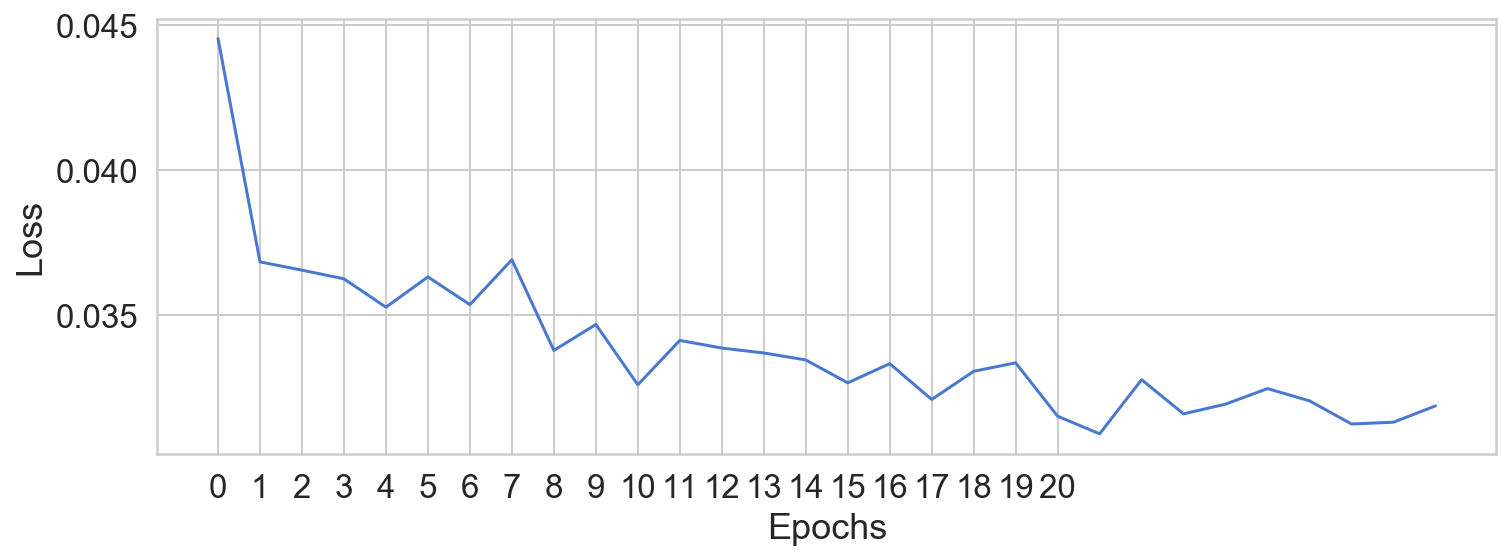

In [40]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [41]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [42]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[11.07251965],
       [10.83325528],
       [10.65944359],
       [10.53847033],
       [10.46167731],
       [10.41943071],
       [10.41066536],
       [10.43227527],
       [10.46951503],
       [10.50732417],
       [10.53811927],
       [10.55979475],
       [10.5731655 ],
       [10.58025871],
       [10.58323514],
       [10.58387569],
       [10.58343026],
       [10.58266176],
       [10.58196044],
       [10.58146463],
       [10.58118314],
       [10.58108398],
       [10.58111117],
       [10.58117515],
       [10.5813079 ],
       [10.58149422],
       [10.58165496],
       [10.58176692],
       [10.58182689],
       [10.58184528],
       [10.58185328],
       [10.58191726],
       [10.58198763],
       [10.58203081],
       [10.582066  ],
       [10.58208199],
       [10.582066  ],
       [10.5820644 ],
       [10.58208999],
       [10.58210758]])

In [66]:
test['LSTM_Predictions'] = lstm_predictions
test

,unit_sales,LSTM_Predictions
date,,
2013-05-22,2,5.871847
2013-05-23,3,5.886119
2013-05-24,9,5.916873
2013-05-25,3,5.949524
2013-05-26,5,5.982970
2013-05-27,7,6.016179
2013-05-28,3,6.048362
2013-05-29,5,6.078949
2013-05-30,3,6.107591


In [67]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(test['unit_sales'],test['LSTM_Predictions'])

11.031139545588072

In [68]:
reframed_data = series_to_supervised(df, 1, 1)

NameError: name 'series_to_supervised' is not defined

In [43]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [44]:
reframed_data = series_to_supervised(df, 1, 1)

In [45]:
reframed_data.head()

,var1(t-1),var1(t)
date,,
2013-03-01,27.857,3.759
2013-04-01,3.759,14.855
2013-05-01,14.855,16.124
2013-06-01,16.124,8.337
2013-07-01,8.337,11.455


In [46]:
#reframed_data.drop(reframed_data.columns[[7,8,9,10,11]], axis=1, inplace=True)
print(reframed_data.columns)

Index(['var1(t-1)', 'var1(t)'], dtype='object')


In [47]:
values = reframed_data.values
train_index =int(len(reframed_data.index) * 0.8) #The logic is to have 500 days worth of training data. this could also be a hyperparameter that can be tuned.
train = values[:train_index, :]
test = values[train_index:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(239, 1, 1) (239,) (60, 1, 1) (60,)


In [48]:
from keras.layers import Dropout

Train on 239 samples, validate on 60 samples
Epoch 1/20
239/239 [==============================] - 1s 6ms/step - loss: 178.5056 - val_loss: 185.9977
Epoch 2/20
239/239 [==============================] - 0s 389us/step - loss: 160.1190 - val_loss: 160.5901
Epoch 3/20
239/239 [==============================] - 0s 368us/step - loss: 131.9426 - val_loss: 124.5385
Epoch 4/20
239/239 [==============================] - 0s 412us/step - loss: 97.9374 - val_loss: 88.0875
Epoch 5/20
239/239 [==============================] - 0s 433us/step - loss: 68.6886 - val_loss: 62.0821
Epoch 6/20
239/239 [==============================] - 0s 359us/step - loss: 51.2816 - val_loss: 47.0438
Epoch 7/20
239/239 [==============================] - 0s 435us/step - loss: 39.9054 - val_loss: 38.6445
Epoch 8/20
239/239 [==============================] - 0s 413us/step - loss: 34.3102 - val_loss: 33.6630
Epoch 9/20
239/239 [==============================] - 0s 441us/step - loss: 30.7371 - val_loss: 30.5079
Epoch 10/20
239

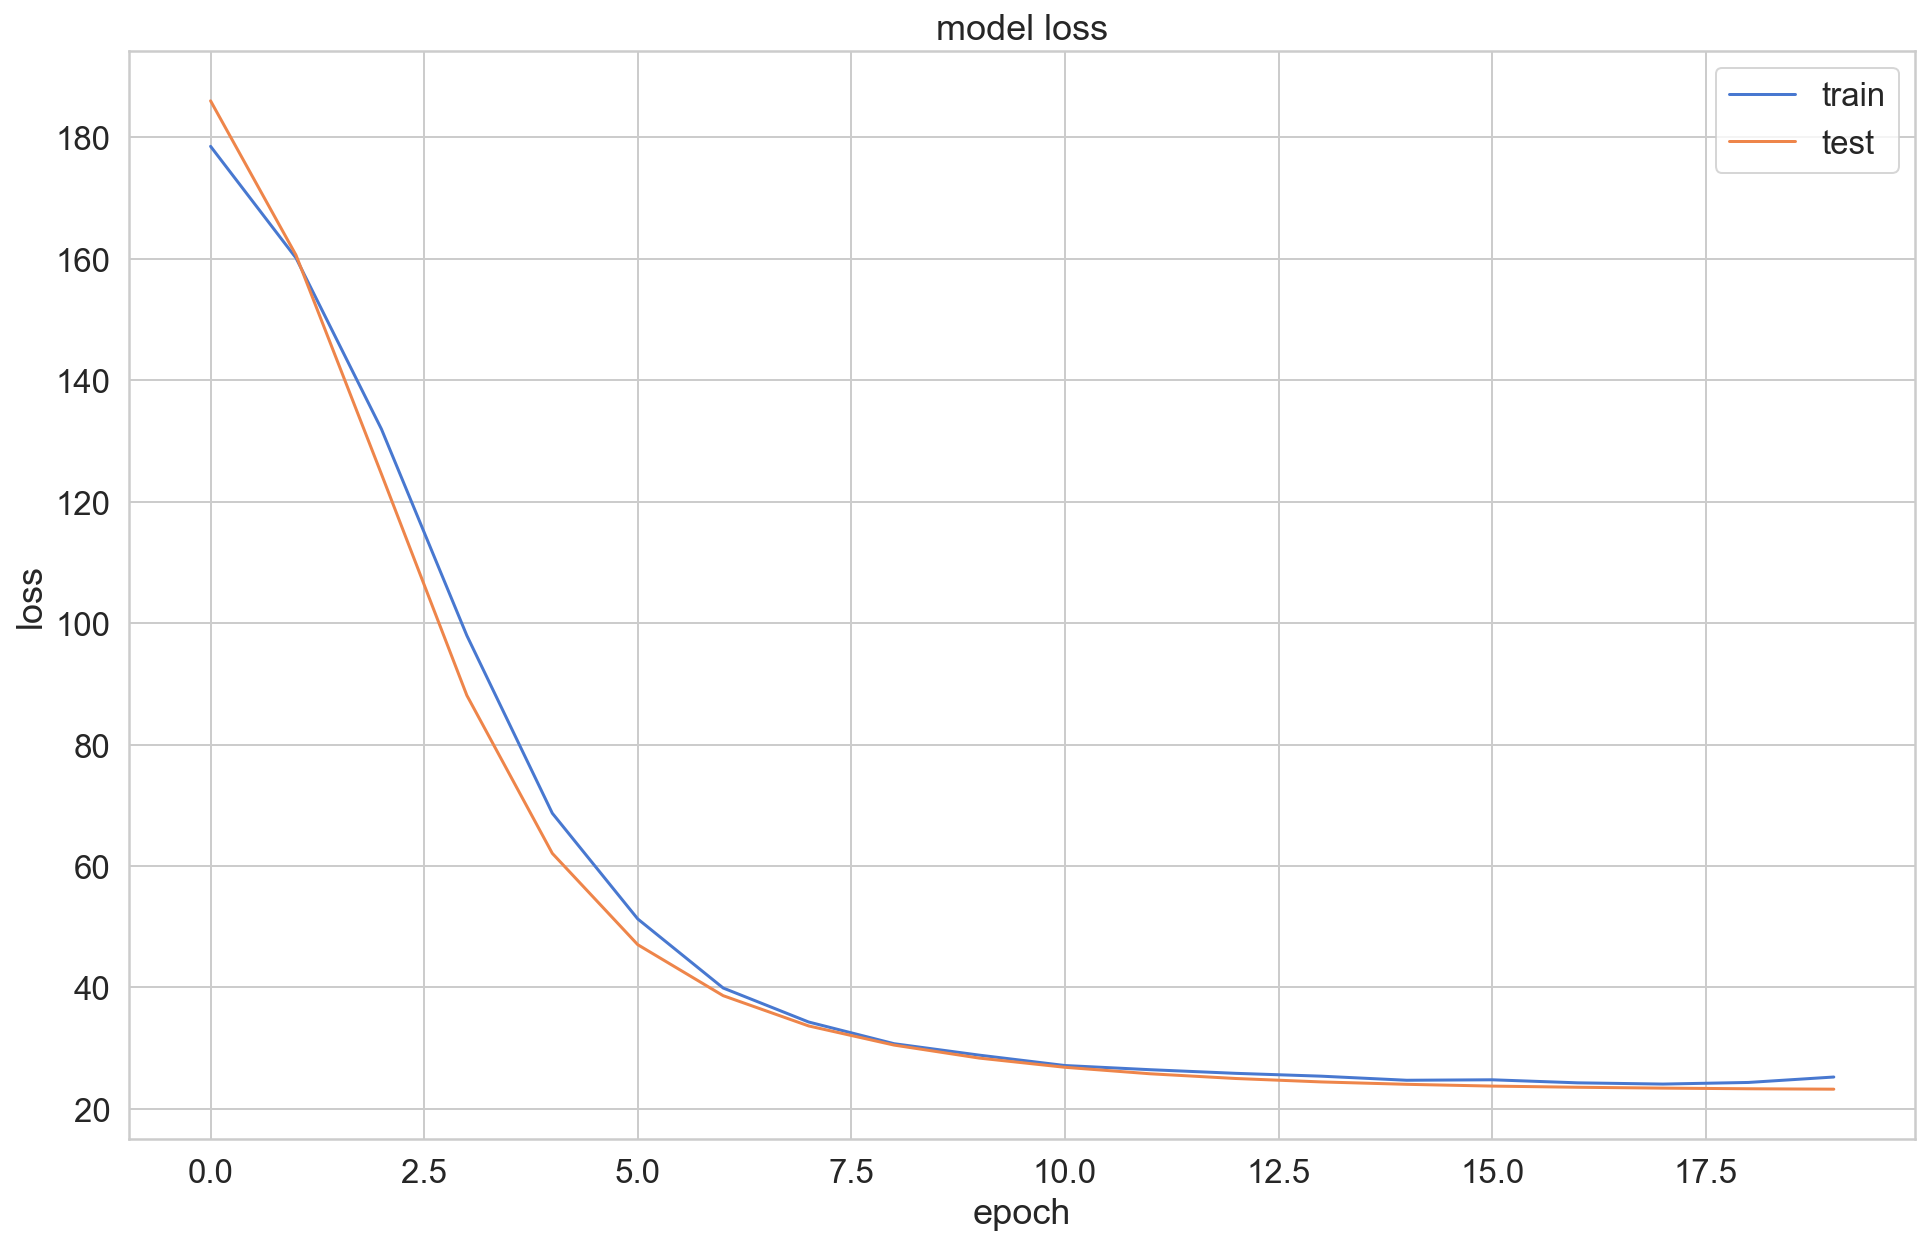

In [49]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=20, validation_data=(test_X, test_y), verbose=1, shuffle=False)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [54]:
yhat = model.predict(test_X, verbose=0)
rmse = np.sqrt(mean_squared_error(test_y[20:], yhat[20:]))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 4.982


In [70]:
values = reframed_data.values
train_index =int(len(reframed_data.index) * 0.8) #The logic is to have 500 days worth of training data. this could also be a hyperparameter that can be tuned.
train = values[:train_index, :]
test = values[train_index:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(239, 1, 1) (239,) (60, 1, 1) (60,)


ValueError: cannot reshape array of size 239 into shape (239,2,1,1)

In [71]:
X_train, X_valid, Y_train, Y_valid = train_test_split(series,'unit_sales', test_size=0.2, random_state=0)
#Y_valid=df[258:].unit_sales
X_train_series = train.reshape((train.shape[0], train.shape[1],1))
X_valid_series = test.reshape((test.shape[0], test.shape[1],1))
subsequences = 2
timesteps = train.shape[1]//subsequences
X_train_series_sub = train_X.reshape((X_train_series.shape[0], subsequences, timesteps, 1))
X_valid_series_sub = test_X.reshape((X_valid_series.shape[0], subsequences, timesteps, 1))
model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, X_train_series_sub.shape[2], X_train_series_sub.shape[3])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(50, activation='relu'))
            #model_cnn_lstm.add(LSTM(10, stateful=True))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer='adam')
cnn_lstm_history = model_cnn_lstm.fit(X_train_series_sub, Y_train, validation_data=(X_valid_series_sub, Y_valid), epochs=60, verbose=2)
cnn_lstm_valid_pred = model_cnn_lstm.predict(X_valid_series_sub)

ValueError: cannot reshape array of size 239 into shape (239,2,1,1)

In [111]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from datetime import datetime
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

In [130]:
error = pd.DataFrame(columns=['File_name','RMSE_ERROR_LSTM','RMSE_ERROR_ARIMA','MSE','MAPE'])

In [113]:
dff=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/sorted_arima.csv")

In [115]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [135]:
import os
import logging, sys
logging.disable(sys.maxsize)
from math import sqrt
paths_to_folders = ['C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/STORE__1']
x=0
for folder in paths_to_folders:
   for csv_file in os.listdir(folder):
        if  any(dff.File_name ==""+csv_file)==True:
       #if len(df.index)>=100:
            select_indices=list(np.where(dff["File_name"] == ''+csv_file)[0])
            print(select_indices)
            df=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/STORE__1/"+csv_file,parse_dates=['date'],index_col='date')
            df.drop(['id','store_nbr','item_nbr','onpromotion'], axis=1,inplace=True)
            reframed_data = series_to_supervised(df, 1, 1)
            values = reframed_data.values
            train_index =int(len(reframed_data.index) * 0.8) 
            train = values[:train_index, :]
            test = values[train_index:, :]
            train_X, train_y = train[:, :-1], train[:, -1]
            test_X, test_y = test[:, :-1], test[:, -1]
            train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
            test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
            model = Sequential()
            model.add(LSTM(100, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
            model.add(Dropout(0.2))
            model.add(LSTM(50))
            model.add(Dropout(0.1))
            model.add(Dense(1))
            model.compile(loss='mean_squared_error', optimizer='adam')
            # fit network
            history = model.fit(train_X, train_y, epochs=20, batch_size=20, validation_data=(test_X, test_y), verbose=1, shuffle=False)
            yhat = model.predict(test_X, verbose=0)
            rmse = np.sqrt(mean_squared_error(test_y, yhat))
            error.loc[x, ['File_name']]=csv_file
            error.loc[x, ['RMSE_ERROR_LSTM']]=rmse
            if len(select_indices)==1:
                b=dff.iloc[select_indices[0]]['RMSE_ERROR']
                error.loc[x, ['RMSE_ERROR_ARIMA']]=b
            error.loc[x, ['MSE']]=mean_squared_error(test_y, yhat)
            error.loc[x, ['MAPE']]=mean_absolute_percentage_error(test_y, yhat)
            x=x+1

[99]
Train on 100 samples, validate on 26 samples
Epoch 1/20
100/100 [==============================] - 3s 33ms/step - loss: 7.9485 - val_loss: 5.2699
Epoch 2/20
100/100 [==============================] - 0s 1ms/step - loss: 7.6518 - val_loss: 5.0062
Epoch 3/20
100/100 [==============================] - 0s 1ms/step - loss: 7.3137 - val_loss: 4.7065
Epoch 4/20
100/100 [==============================] - 0s 858us/step - loss: 6.9141 - val_loss: 4.3555
Epoch 5/20
100/100 [==============================] - 0s 1ms/step - loss: 6.4639 - val_loss: 3.9415
Epoch 6/20
100/100 [==============================] - 0s 1ms/step - loss: 5.8947 - val_loss: 3.4619
Epoch 7/20
100/100 [==============================] - 0s 1ms/step - loss: 5.3267 - val_loss: 2.9356
Epoch 8/20
100/100 [==============================] - 0s 973us/step - loss: 4.6042 - val_loss: 2.4072
Epoch 9/20
100/100 [==============================] - 0s 938us/step - loss: 4.0243 - val_loss: 1.9597
Epoch 10/20
100/100 [======================

97/97 [==============================] - 0s 1ms/step - loss: 3.3069 - val_loss: 1.9069
[13]
Train on 80 samples, validate on 21 samples
Epoch 1/20
80/80 [==============================] - 6s 74ms/step - loss: 4.0888 - val_loss: 2.8692
Epoch 2/20
80/80 [==============================] - 0s 1ms/step - loss: 3.9330 - val_loss: 2.7459
Epoch 3/20
80/80 [==============================] - 0s 1ms/step - loss: 3.7673 - val_loss: 2.6140
Epoch 4/20
80/80 [==============================] - 0s 1ms/step - loss: 3.5832 - val_loss: 2.4684
Epoch 5/20
80/80 [==============================] - 0s 1ms/step - loss: 3.3840 - val_loss: 2.3052
Epoch 6/20
80/80 [==============================] - 0s 1ms/step - loss: 3.1718 - val_loss: 2.1220
Epoch 7/20
80/80 [==============================] - 0s 1ms/step - loss: 2.9399 - val_loss: 1.9194
Epoch 8/20
80/80 [==============================] - 0s 1ms/step - loss: 2.6725 - val_loss: 1.7004
Epoch 9/20
80/80 [==============================] - 0s 1ms/step - loss: 2.3997 

110/110 [==============================] - 0s 1ms/step - loss: 2.7837 - val_loss: 2.5051
[37]
Train on 82 samples, validate on 21 samples
Epoch 1/20
82/82 [==============================] - 5s 66ms/step - loss: 4.2243 - val_loss: 4.4406
Epoch 2/20
82/82 [==============================] - 0s 1ms/step - loss: 4.0462 - val_loss: 4.2220
Epoch 3/20
82/82 [==============================] - 0s 1ms/step - loss: 3.8535 - val_loss: 3.9820
Epoch 4/20
82/82 [==============================] - 0s 2ms/step - loss: 3.6496 - val_loss: 3.7083
Epoch 5/20
82/82 [==============================] - 0s 1ms/step - loss: 3.4050 - val_loss: 3.3924
Epoch 6/20
82/82 [==============================] - 0s 1ms/step - loss: 3.1398 - val_loss: 3.0337
Epoch 7/20
82/82 [==============================] - 0s 1ms/step - loss: 2.8462 - val_loss: 2.6405
Epoch 8/20
82/82 [==============================] - 0s 1ms/step - loss: 2.5692 - val_loss: 2.2454
Epoch 9/20
82/82 [==============================] - 0s 1ms/step - loss: 2.293

107/107 [==============================] - 7s 67ms/step - loss: 5.3519 - val_loss: 4.4893
Epoch 2/20
107/107 [==============================] - 0s 1ms/step - loss: 5.1038 - val_loss: 4.2488
Epoch 3/20
107/107 [==============================] - 0s 1ms/step - loss: 4.8388 - val_loss: 3.9739
Epoch 4/20
107/107 [==============================] - 0s 1ms/step - loss: 4.5245 - val_loss: 3.6437
Epoch 5/20
107/107 [==============================] - 0s 1ms/step - loss: 4.1524 - val_loss: 3.2460
Epoch 6/20
107/107 [==============================] - 0s 1ms/step - loss: 3.7168 - val_loss: 2.7848
Epoch 7/20
107/107 [==============================] - 0s 1ms/step - loss: 3.2561 - val_loss: 2.3055
Epoch 8/20
107/107 [==============================] - 0s 1ms/step - loss: 2.8190 - val_loss: 1.8911
Epoch 9/20
107/107 [==============================] - 0s 1ms/step - loss: 2.4442 - val_loss: 1.6244
Epoch 10/20
107/107 [==============================] - 0s 979us/step - loss: 2.3679 - val_loss: 1.5133
Epoch 1

Epoch 2/20
98/98 [==============================] - 0s 1ms/step - loss: 5.0228 - val_loss: 3.4634
Epoch 3/20
98/98 [==============================] - 0s 1ms/step - loss: 4.7760 - val_loss: 3.2437
Epoch 4/20
98/98 [==============================] - 0s 2ms/step - loss: 4.4913 - val_loss: 2.9908
Epoch 5/20
98/98 [==============================] - 0s 1ms/step - loss: 4.1730 - val_loss: 2.6962
Epoch 6/20
98/98 [==============================] - 0s 1ms/step - loss: 3.7872 - val_loss: 2.3603
Epoch 7/20
98/98 [==============================] - 0s 1ms/step - loss: 3.3372 - val_loss: 1.9939
Epoch 8/20
98/98 [==============================] - 0s 1ms/step - loss: 2.9057 - val_loss: 1.6328
Epoch 9/20
98/98 [==============================] - 0s 1ms/step - loss: 2.4964 - val_loss: 1.3337
Epoch 10/20
98/98 [==============================] - 0s 1ms/step - loss: 2.1992 - val_loss: 1.1610
Epoch 11/20
98/98 [==============================] - 0s 1ms/step - loss: 2.0298 - val_loss: 1.1218
Epoch 12/20
98/98 

Epoch 2/20
111/111 [==============================] - 0s 2ms/step - loss: 6.8950 - val_loss: 6.7450
Epoch 3/20
111/111 [==============================] - 0s 2ms/step - loss: 6.5029 - val_loss: 6.3316
Epoch 4/20
111/111 [==============================] - 0s 2ms/step - loss: 6.0278 - val_loss: 5.8360
Epoch 5/20
111/111 [==============================] - 0s 1ms/step - loss: 5.4387 - val_loss: 5.2513
Epoch 6/20
111/111 [==============================] - 0s 2ms/step - loss: 4.7837 - val_loss: 4.6027
Epoch 7/20
111/111 [==============================] - 0s 2ms/step - loss: 4.0745 - val_loss: 3.9692
Epoch 8/20
111/111 [==============================] - 0s 2ms/step - loss: 3.4724 - val_loss: 3.4842
Epoch 9/20
111/111 [==============================] - 0s 2ms/step - loss: 2.9611 - val_loss: 3.2584
Epoch 10/20
111/111 [==============================] - 0s 2ms/step - loss: 2.7457 - val_loss: 3.2285
Epoch 11/20
111/111 [==============================] - 0s 2ms/step - loss: 2.7154 - val_loss: 3.191

82/82 [==============================] - 0s 2ms/step - loss: 9.4628 - val_loss: 2.8008
Epoch 3/20
82/82 [==============================] - 0s 2ms/step - loss: 9.1806 - val_loss: 2.6786
Epoch 4/20
82/82 [==============================] - 0s 2ms/step - loss: 8.8916 - val_loss: 2.5432
Epoch 5/20
82/82 [==============================] - 0s 2ms/step - loss: 8.5420 - val_loss: 2.3896
Epoch 6/20
82/82 [==============================] - 0s 2ms/step - loss: 8.1233 - val_loss: 2.2144
Epoch 7/20
82/82 [==============================] - 0s 3ms/step - loss: 7.6564 - val_loss: 2.0169
Epoch 8/20
82/82 [==============================] - 0s 2ms/step - loss: 7.1691 - val_loss: 1.8011
Epoch 9/20
82/82 [==============================] - 0s 2ms/step - loss: 6.6238 - val_loss: 1.5777
Epoch 10/20
82/82 [==============================] - 0s 2ms/step - loss: 6.1404 - val_loss: 1.3671
Epoch 11/20
82/82 [==============================] - 0s 2ms/step - loss: 5.6502 - val_loss: 1.1913
Epoch 12/20
82/82 [==========

98/98 [==============================] - 0s 2ms/step - loss: 7.8587 - val_loss: 5.0928
Epoch 3/20
98/98 [==============================] - 0s 2ms/step - loss: 7.4655 - val_loss: 4.8062
Epoch 4/20
98/98 [==============================] - 0s 2ms/step - loss: 7.0118 - val_loss: 4.4710
Epoch 5/20
98/98 [==============================] - 0s 2ms/step - loss: 6.5001 - val_loss: 4.0768
Epoch 6/20
98/98 [==============================] - 0s 2ms/step - loss: 5.8614 - val_loss: 3.6274
Epoch 7/20
98/98 [==============================] - 0s 2ms/step - loss: 5.2703 - val_loss: 3.1479
Epoch 8/20
98/98 [==============================] - 0s 2ms/step - loss: 4.5045 - val_loss: 2.6905
Epoch 9/20
98/98 [==============================] - 0s 2ms/step - loss: 3.8676 - val_loss: 2.3385
Epoch 10/20
98/98 [==============================] - 0s 2ms/step - loss: 3.2871 - val_loss: 2.1641
Epoch 11/20
98/98 [==============================] - 0s 2ms/step - loss: 3.1846 - val_loss: 2.1482
Epoch 12/20
98/98 [==========

87/87 [==============================] - 0s 2ms/step - loss: 3.5194 - val_loss: 2.8880
Epoch 3/20
87/87 [==============================] - 0s 3ms/step - loss: 3.3593 - val_loss: 2.7364
Epoch 4/20
87/87 [==============================] - 0s 2ms/step - loss: 3.1757 - val_loss: 2.5603
Epoch 5/20
87/87 [==============================] - 0s 2ms/step - loss: 2.9613 - val_loss: 2.3517
Epoch 6/20
87/87 [==============================] - 0s 2ms/step - loss: 2.6958 - val_loss: 2.1059
Epoch 7/20
87/87 [==============================] - 0s 3ms/step - loss: 2.3843 - val_loss: 1.8255
Epoch 8/20
87/87 [==============================] - 0s 3ms/step - loss: 2.0808 - val_loss: 1.5266
Epoch 9/20
87/87 [==============================] - 0s 2ms/step - loss: 1.7357 - val_loss: 1.2406
Epoch 10/20
87/87 [==============================] - 0s 3ms/step - loss: 1.4378 - val_loss: 1.0140
Epoch 11/20
87/87 [==============================] - 0s 3ms/step - loss: 1.1458 - val_loss: 0.8894
Epoch 12/20
87/87 [==========

Epoch 2/20
87/87 [==============================] - 0s 3ms/step - loss: 4.3085 - val_loss: 2.6500
Epoch 3/20
87/87 [==============================] - 0s 3ms/step - loss: 4.0965 - val_loss: 2.4925
Epoch 4/20
87/87 [==============================] - 0s 3ms/step - loss: 3.8468 - val_loss: 2.3180
Epoch 5/20
87/87 [==============================] - 0s 3ms/step - loss: 3.5850 - val_loss: 2.1217
Epoch 6/20
87/87 [==============================] - 0s 3ms/step - loss: 3.2778 - val_loss: 1.8994
Epoch 7/20
87/87 [==============================] - 0s 3ms/step - loss: 2.9263 - val_loss: 1.6557
Epoch 8/20
87/87 [==============================] - 0s 3ms/step - loss: 2.5776 - val_loss: 1.4028
Epoch 9/20
87/87 [==============================] - 0s 2ms/step - loss: 2.2114 - val_loss: 1.1658
Epoch 10/20
87/87 [==============================] - 0s 3ms/step - loss: 1.7583 - val_loss: 0.9821
Epoch 11/20
87/87 [==============================] - 0s 2ms/step - loss: 1.5408 - val_loss: 0.8871
Epoch 12/20
87/87 

Epoch 2/20
80/80 [==============================] - 0s 3ms/step - loss: 6.5979 - val_loss: 5.4042
Epoch 3/20
80/80 [==============================] - 0s 3ms/step - loss: 6.3964 - val_loss: 5.1944
Epoch 4/20
80/80 [==============================] - 0s 3ms/step - loss: 6.1658 - val_loss: 4.9600
Epoch 5/20
80/80 [==============================] - 0s 3ms/step - loss: 5.9051 - val_loss: 4.6929
Epoch 6/20
80/80 [==============================] - 0s 2ms/step - loss: 5.6350 - val_loss: 4.3881
Epoch 7/20
80/80 [==============================] - 0s 3ms/step - loss: 5.2751 - val_loss: 4.0443
Epoch 8/20
80/80 [==============================] - 0s 4ms/step - loss: 4.9028 - val_loss: 3.6633
Epoch 9/20
80/80 [==============================] - 0s 4ms/step - loss: 4.5666 - val_loss: 3.2589
Epoch 10/20
80/80 [==============================] - 0s 3ms/step - loss: 4.1241 - val_loss: 2.8546
Epoch 11/20
80/80 [==============================] - 0s 3ms/step - loss: 3.7584 - val_loss: 2.4849
Epoch 12/20
80/80 

114/114 [==============================] - 0s 3ms/step - loss: 6.7414 - val_loss: 7.0353
Epoch 3/20
114/114 [==============================] - 0s 3ms/step - loss: 6.2730 - val_loss: 6.4928
Epoch 4/20
114/114 [==============================] - 0s 3ms/step - loss: 5.7574 - val_loss: 5.8528
Epoch 5/20
114/114 [==============================] - 0s 3ms/step - loss: 5.0690 - val_loss: 5.1087
Epoch 6/20
114/114 [==============================] - 0s 3ms/step - loss: 4.3824 - val_loss: 4.2984
Epoch 7/20
114/114 [==============================] - 0s 3ms/step - loss: 3.6440 - val_loss: 3.5405
Epoch 8/20
114/114 [==============================] - 0s 3ms/step - loss: 3.0170 - val_loss: 2.9934
Epoch 9/20
114/114 [==============================] - 0s 3ms/step - loss: 2.7619 - val_loss: 2.7512
Epoch 10/20
114/114 [==============================] - 0s 3ms/step - loss: 2.6959 - val_loss: 2.6735
Epoch 11/20
114/114 [==============================] - 0s 3ms/step - loss: 2.6170 - val_loss: 2.5901
Epoch 12/

100/100 [==============================] - 0s 3ms/step - loss: 4.9096 - val_loss: 3.4559
Epoch 3/20
100/100 [==============================] - 0s 2ms/step - loss: 4.6669 - val_loss: 3.2376
Epoch 4/20
100/100 [==============================] - 0s 3ms/step - loss: 4.3706 - val_loss: 2.9815
Epoch 5/20
100/100 [==============================] - 0s 3ms/step - loss: 4.0494 - val_loss: 2.6773
Epoch 6/20
100/100 [==============================] - 0s 3ms/step - loss: 3.6529 - val_loss: 2.3196
Epoch 7/20
100/100 [==============================] - 0s 3ms/step - loss: 3.1830 - val_loss: 1.9146
Epoch 8/20
100/100 [==============================] - 0s 4ms/step - loss: 2.6992 - val_loss: 1.4900
Epoch 9/20
100/100 [==============================] - 0s 3ms/step - loss: 2.1670 - val_loss: 1.1000
Epoch 10/20
100/100 [==============================] - 0s 3ms/step - loss: 1.8415 - val_loss: 0.8221
Epoch 11/20
100/100 [==============================] - 0s 3ms/step - loss: 1.6673 - val_loss: 0.7036
Epoch 12/

93/93 [==============================] - 26s 276ms/step - loss: 6.6300 - val_loss: 5.3164
Epoch 2/20
93/93 [==============================] - 0s 4ms/step - loss: 6.3246 - val_loss: 5.0813
Epoch 3/20
93/93 [==============================] - 0s 4ms/step - loss: 5.9998 - val_loss: 4.8212
Epoch 4/20
93/93 [==============================] - 0s 5ms/step - loss: 5.6166 - val_loss: 4.5256
Epoch 5/20
93/93 [==============================] - 0s 4ms/step - loss: 5.2121 - val_loss: 4.1902
Epoch 6/20
93/93 [==============================] - 1s 6ms/step - loss: 4.7111 - val_loss: 3.8208
Epoch 7/20
93/93 [==============================] - 1s 7ms/step - loss: 4.1769 - val_loss: 3.4370
Epoch 8/20
93/93 [==============================] - 1s 7ms/step - loss: 3.5928 - val_loss: 3.0825
Epoch 9/20
93/93 [==============================] - 0s 4ms/step - loss: 3.1736 - val_loss: 2.8247
Epoch 10/20
93/93 [==============================] - 0s 4ms/step - loss: 2.7780 - val_loss: 2.7021
Epoch 11/20
93/93 [========

In [138]:
error.to_csv("LSTM_forecast_error.csv")

In [139]:
error.head()

,File_name,RMSE_ERROR_LSTM,RMSE_ERROR_ARIMA,MSE,MAPE
0,S_1__I_1001305.csv,1.10799,1.40755,1.22765,53.6724
1,S_1__I_1009998.csv,1.35859,1.35012,1.84576,64.8871
2,S_1__I_1010752.csv,1.00519,1.22663,1.01041,40.3734
3,S_1__I_1018617.csv,1.35548,1.2897,1.83733,66.4722
4,S_1__I_1040170.csv,1.19962,1.24841,1.43909,54.7809
